# Vectorize Geo-Polar

This notebook creates a vector boundary of the geopolar dataset, which is later used to filter for CBP stations that only lie within the boundaries of the Geo-Polar dataset.

In [2]:
import os
from pathlib import Path

import xarray as xr
from geocube.vector import vectorize

In [3]:
REPO_ROOT = os.getenv('REPO_ROOT', '/Users/rwegener/repos/chesapeake_mhw')
REPO_ROOT = Path(REPO_ROOT)

In [26]:
sst_filename = 'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
path = REPO_ROOT /'data/raw' / sst_filename
geopolar = xr.open_dataset(path)
geopolar = geopolar.analysed_sst.isel(time=0)

Create a mask showing land vs. water

In [27]:
geopolar_mask = xr.where(~geopolar.isnull(), 1, 0)

Convert the vector to a raster

In [30]:
grid_gdf = vectorize(geopolar_mask.astype('uint8'))

Extract just the water area and reformat

In [39]:
cbay_shape = grid_gdf[grid_gdf.analysed_sst == 1]

In [40]:
cbay_shape = cbay_shape.rename(columns={'analysed_sst': 'is_water'})

<AxesSubplot: >

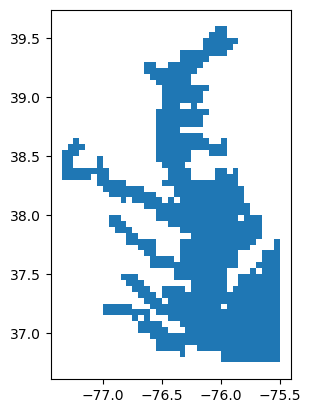

In [42]:
cbay_shape.plot()

Save the output as a GeoJSON

In [43]:
cbay_shape.to_file(
    REPO_ROOT / 'data/interim' / 'geopolar_shape_vector.json',
    driver="GeoJSON"
)

### MUR

In [45]:
path = (
    REPO_ROOT / 'data/raw' / 
    'MUR-JPL-L4_GHRSST-SSTfnd-GLOB-v02.0-fv04.1-20020901_20230831.nc'
)
mur = xr.open_dataset(path).analysed_sst.isel(time=0)

Create a mask showing land vs. water

In [46]:
mur_mask = xr.where(~mur.isnull(), 1, 0)

Convert the vector to a raster

In [47]:
grid_gdf = vectorize(mur_mask.astype('uint8'))

Extract just the water area and reformat

In [48]:
cbay_shape = grid_gdf[grid_gdf.analysed_sst == 1]

In [49]:
cbay_shape = cbay_shape.rename(columns={'analysed_sst': 'is_water'})

<AxesSubplot: >

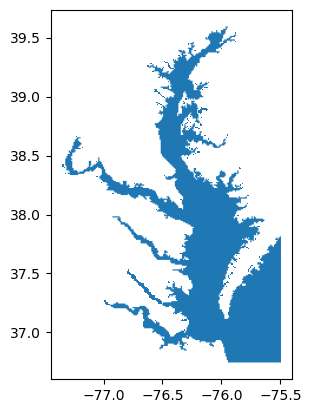

In [53]:
cbay_shape.plot()

Save the output as a GeoJSON

In [52]:
cbay_shape.to_file(
    REPO_ROOT / 'data/interim' / 'mur_shape_vector.json',
    driver="GeoJSON"
)